In [23]:
import urllib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import PIL
import os
import zipfile
from pathlib import Path
import gdown
import tensorflow as tf
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn import set_config; set_config(display='diagram')

#----modules----
from taxifare.ml_logic.data import clean_data
from taxifare.ml_logic.preprocessor import preprocess_features
from taxifare.ml_logic.model import initialize_model, compile_model, train_model
from taxifare.ml_logic.registry import save_model, save_results, load_model

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load Data

In [2]:
# Define the paths
LOCAL_DATA_PATH = Path("data")
ZIP_FILE_PATH = LOCAL_DATA_PATH / "train.zip"
CSV_FILE_PATH = LOCAL_DATA_PATH / "train.csv"
GOOGLE_DRIVE_URL = "https://drive.google.com/uc?id=1LjbOSSAdISbvQIia1GbvIKUOxX4ym0v2"  # Direct link for download

# Create the data folder if it doesn't exist
LOCAL_DATA_PATH.mkdir(parents=True, exist_ok=True)

# Check if train.csv exists
if CSV_FILE_PATH.is_file():
    print(f"{CSV_FILE_PATH.name} already exists. No further action required.")
else:
    print(f"{CSV_FILE_PATH.name} does not exist. Checking for {ZIP_FILE_PATH.name}...")

    # Check if the zip file exists
    if ZIP_FILE_PATH.is_file():
        print(f"{ZIP_FILE_PATH.name} found. Extracting...")
        # Extract the zip file
        with zipfile.ZipFile(ZIP_FILE_PATH, 'r') as zip_ref:
            zip_ref.extractall(LOCAL_DATA_PATH)
        print(f"Extracted contents to {LOCAL_DATA_PATH}")
    else:
        print(f"{ZIP_FILE_PATH.name} not found. Downloading from Google Drive...")
        # Download the zip file
        gdown.download(GOOGLE_DRIVE_URL, str(ZIP_FILE_PATH), quiet=False)

        # Extract the zip file
        print(f"Extracting {ZIP_FILE_PATH.name}...")
        with zipfile.ZipFile(ZIP_FILE_PATH, 'r') as zip_ref:
            zip_ref.extractall(LOCAL_DATA_PATH)
        print(f"Extracted contents to {LOCAL_DATA_PATH}")

    # Final check for train.csv
    if CSV_FILE_PATH.is_file():
        print(f"{CSV_FILE_PATH.name} is now available.")
    else:
        print(f"Error: {CSV_FILE_PATH.name} is still missing after all operations.")


train.csv already exists. No further action required.


# Clean and preprocess data

In [3]:
CHUNK_SIZE=100000
input_csv_path = CSV_FILE_PATH
output_csv_path = LOCAL_DATA_PATH/'cleaned.csv'

# Ensure the directory exists
output_csv_path.parent.mkdir(parents=True, exist_ok=True)

In [9]:

# Process the dataset in chunks
with pd.read_csv(input_csv_path, chunksize=CHUNK_SIZE) as reader:
    for chunk_id, chunk in enumerate(reader):
        print(f"Processing chunk {chunk_id + 1}...")

        # Clean chunk
        chunk_clean = clean_data(chunk)

        # Create X_chunk (features) and y_chunk (target)
        X_chunk = chunk_clean.drop("fare_amount", axis=1)
        y_chunk = chunk_clean[["fare_amount"]]

        # Preprocess features
        X_processed_chunk = preprocess_features(X_chunk)

        # Combine processed features with the target
        chunk_processed = pd.DataFrame(
            np.concatenate((X_processed_chunk, y_chunk), axis=1)
        )

        # Save processed chunk to the output file
        chunk_processed.to_csv(
            output_csv_path,
            mode="w" if chunk_id == 0 else "a",  # Write mode for the first chunk, append for the rest
            header=False,  # No headers in the output
            index=False    # No index in the output
        )

        print(f"Chunk {chunk_id + 1} processed and saved.")

print(f"✅ All chunks processed and saved to {output_csv_path}.")


Processing chunk 1...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97347, 65)
Chunk 1 processed and saved.
Processing chunk 2...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97457, 65)
Chunk 2 processed and saved.
Processing chunk 3...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97440, 65)
Chunk 3 processed and saved.
Processing chunk 4...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97358, 65)
Chunk 4 processed and saved.
Processing chunk 5...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97398, 65)
Chunk 5 processed and saved.
Processing chunk 6...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97447, 65)
Chunk 6 processed and saved.
Processing chunk 7...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97515, 65)
Chunk 7 processed and saved.
Processing chunk 8...
✅ data cleaned

Preprocessing features...
✅ X_processed, with

✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97417, 65)
Chunk 59 processed and saved.
Processing chunk 60...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97440, 65)
Chunk 60 processed and saved.
Processing chunk 61...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97366, 65)
Chunk 61 processed and saved.
Processing chunk 62...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97433, 65)
Chunk 62 processed and saved.
Processing chunk 63...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97420, 65)
Chunk 63 processed and saved.
Processing chunk 64...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97383, 65)
Chunk 64 processed and saved.
Processing chunk 65...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97402, 65)
Chunk 65 processed and saved.
Processing chunk 66...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (

Chunk 116 processed and saved.
Processing chunk 117...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97430, 65)
Chunk 117 processed and saved.
Processing chunk 118...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97394, 65)
Chunk 118 processed and saved.
Processing chunk 119...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97379, 65)
Chunk 119 processed and saved.
Processing chunk 120...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97437, 65)
Chunk 120 processed and saved.
Processing chunk 121...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97391, 65)
Chunk 121 processed and saved.
Processing chunk 122...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97369, 65)
Chunk 122 processed and saved.
Processing chunk 123...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97337, 65)
Chunk 123 processed and saved.
Processing chunk 124...


Chunk 173 processed and saved.
Processing chunk 174...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97386, 65)
Chunk 174 processed and saved.
Processing chunk 175...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97451, 65)
Chunk 175 processed and saved.
Processing chunk 176...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97362, 65)
Chunk 176 processed and saved.
Processing chunk 177...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97446, 65)
Chunk 177 processed and saved.
Processing chunk 178...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97425, 65)
Chunk 178 processed and saved.
Processing chunk 179...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97460, 65)
Chunk 179 processed and saved.
Processing chunk 180...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97375, 65)
Chunk 180 processed and saved.
Processing chunk 181...


Chunk 230 processed and saved.
Processing chunk 231...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97408, 65)
Chunk 231 processed and saved.
Processing chunk 232...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97357, 65)
Chunk 232 processed and saved.
Processing chunk 233...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97327, 65)
Chunk 233 processed and saved.
Processing chunk 234...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97350, 65)
Chunk 234 processed and saved.
Processing chunk 235...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97485, 65)
Chunk 235 processed and saved.
Processing chunk 236...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97333, 65)
Chunk 236 processed and saved.
Processing chunk 237...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97388, 65)
Chunk 237 processed and saved.
Processing chunk 238...


Chunk 287 processed and saved.
Processing chunk 288...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97274, 65)
Chunk 288 processed and saved.
Processing chunk 289...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97395, 65)
Chunk 289 processed and saved.
Processing chunk 290...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97406, 65)
Chunk 290 processed and saved.
Processing chunk 291...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97424, 65)
Chunk 291 processed and saved.
Processing chunk 292...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97378, 65)
Chunk 292 processed and saved.
Processing chunk 293...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97356, 65)
Chunk 293 processed and saved.
Processing chunk 294...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97369, 65)
Chunk 294 processed and saved.
Processing chunk 295...


Chunk 344 processed and saved.
Processing chunk 345...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97432, 65)
Chunk 345 processed and saved.
Processing chunk 346...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97428, 65)
Chunk 346 processed and saved.
Processing chunk 347...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97471, 65)
Chunk 347 processed and saved.
Processing chunk 348...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97426, 65)
Chunk 348 processed and saved.
Processing chunk 349...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97370, 65)
Chunk 349 processed and saved.
Processing chunk 350...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97469, 65)
Chunk 350 processed and saved.
Processing chunk 351...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97450, 65)
Chunk 351 processed and saved.
Processing chunk 352...


Chunk 401 processed and saved.
Processing chunk 402...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97396, 65)
Chunk 402 processed and saved.
Processing chunk 403...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97485, 65)
Chunk 403 processed and saved.
Processing chunk 404...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97366, 65)
Chunk 404 processed and saved.
Processing chunk 405...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97389, 65)
Chunk 405 processed and saved.
Processing chunk 406...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97400, 65)
Chunk 406 processed and saved.
Processing chunk 407...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97428, 65)
Chunk 407 processed and saved.
Processing chunk 408...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97327, 65)
Chunk 408 processed and saved.
Processing chunk 409...


Chunk 458 processed and saved.
Processing chunk 459...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97384, 65)
Chunk 459 processed and saved.
Processing chunk 460...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97407, 65)
Chunk 460 processed and saved.
Processing chunk 461...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97359, 65)
Chunk 461 processed and saved.
Processing chunk 462...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97374, 65)
Chunk 462 processed and saved.
Processing chunk 463...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97397, 65)
Chunk 463 processed and saved.
Processing chunk 464...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97501, 65)
Chunk 464 processed and saved.
Processing chunk 465...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97463, 65)
Chunk 465 processed and saved.
Processing chunk 466...


Chunk 515 processed and saved.
Processing chunk 516...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97378, 65)
Chunk 516 processed and saved.
Processing chunk 517...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97532, 65)
Chunk 517 processed and saved.
Processing chunk 518...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97436, 65)
Chunk 518 processed and saved.
Processing chunk 519...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97488, 65)
Chunk 519 processed and saved.
Processing chunk 520...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97382, 65)
Chunk 520 processed and saved.
Processing chunk 521...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97382, 65)
Chunk 521 processed and saved.
Processing chunk 522...
✅ data cleaned

Preprocessing features...
✅ X_processed, with shape (97423, 65)
Chunk 522 processed and saved.
Processing chunk 523...


# Train data

In [10]:
"""
Incremental training on the (already preprocessed) dataset, stored locally

- Loading data in chunks
- Updating the weight of the model for each chunk
- Saving validation metrics at each chunk, and final model weights on the local disk
"""

data_processed_path = Path(LOCAL_DATA_PATH).joinpath("cleaned.csv")
model = None
metrics_val_list = []  # store the val_mae of each chunk

# Iterate in chunks and partially fit on each chunk
chunks = pd.read_csv(data_processed_path, chunksize=CHUNK_SIZE, header=None)

for chunk_id, chunk in enumerate(chunks):
        
    if chunk_id >= 250: #Stop after 250 chunks
        print(f"Reached the maximum number of chunks: max_chunks")
        break

    print(f"Training on preprocessed chunk n°{chunk_id}")
    # You can adjust training params for each chunk if you want!
    learning_rate = 0.0005
    batch_size = 256
    patience = 2
    split_ratio = 0.1  # Proportion of data for validation

    # Split into train, validation, and test sets
    chunk_test = chunk_shuffled[:test_length]
    chunk_val = chunk_shuffled[test_length:test_length + val_length]
    chunk_train = chunk_shuffled[test_length + val_length:]

    # Extract features and labels
    X_train_chunk = chunk_train[:, :-1]
    y_train_chunk = chunk_train[:, -1]

    X_val_chunk = chunk_val[:, :-1]
    y_val_chunk = chunk_val[:, -1]

    X_test_chunk = chunk_test[:, :-1]
    y_test_chunk = chunk_test[:, -1]

    # Train a model incrementally, and store the val_mae of each chunk in `metrics_val_list`
    if model is None:
        model = initialize_model(input_shape=X_train_chunk.shape[1:])

    model = compile_model(model, learning_rate)

    model, history = train_model(
        model,
        X_train_chunk,
        y_train_chunk,
        batch_size=batch_size,
        patience=patience,
        validation_data=(X_val_chunk, y_val_chunk)
    )

    metrics_val_chunk = np.min(history.history['val_mae'])
    metrics_val_list.append(metrics_val_chunk)

    print(f"Validation MAE for chunk {chunk_id}: {metrics_val_chunk}")





Training on preprocessed chunk n°0
✅ Model initialized
✅ Model compiled

Training model...
Restoring model weights from the end of the best epoch: 24.
Epoch 26: early stopping
✅ Model trained on 80000 rows with min val MAE: 2.0
Validation MAE for chunk 0: 2.0043551921844482
Training on preprocessed chunk n°1
✅ Model compiled

Training model...
Restoring model weights from the end of the best epoch: 6.
Epoch 8: early stopping
✅ Model trained on 80000 rows with min val MAE: 2.0
Validation MAE for chunk 1: 2.0048701763153076
Training on preprocessed chunk n°2
✅ Model compiled

Training model...
Restoring model weights from the end of the best epoch: 2.
Epoch 4: early stopping
✅ Model trained on 80000 rows with min val MAE: 1.99
Validation MAE for chunk 2: 1.9866613149642944
Training on preprocessed chunk n°3
✅ Model compiled

Training model...
Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
✅ Model trained on 80000 rows with min val MAE: 1.99
Validation 

Training on preprocessed chunk n°31
✅ Model compiled

Training model...
Restoring model weights from the end of the best epoch: 1.
Epoch 3: early stopping
✅ Model trained on 80000 rows with min val MAE: 1.97
Validation MAE for chunk 31: 1.9735382795333862
Training on preprocessed chunk n°32
✅ Model compiled

Training model...
Restoring model weights from the end of the best epoch: 1.
Epoch 3: early stopping
✅ Model trained on 80000 rows with min val MAE: 1.94
Validation MAE for chunk 32: 1.9432318210601807
Training on preprocessed chunk n°33
✅ Model compiled

Training model...
Restoring model weights from the end of the best epoch: 1.
Epoch 3: early stopping
✅ Model trained on 80000 rows with min val MAE: 1.93
Validation MAE for chunk 33: 1.9291433095932007
Training on preprocessed chunk n°34
✅ Model compiled

Training model...
Restoring model weights from the end of the best epoch: 1.
Epoch 3: early stopping
✅ Model trained on 80000 rows with min val MAE: 1.95
Validation MAE for chunk

Training on preprocessed chunk n°62
✅ Model compiled

Training model...
Restoring model weights from the end of the best epoch: 2.
Epoch 4: early stopping
✅ Model trained on 80000 rows with min val MAE: 1.96
Validation MAE for chunk 62: 1.9619694948196411
Training on preprocessed chunk n°63
✅ Model compiled

Training model...
Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
✅ Model trained on 80000 rows with min val MAE: 1.91
Validation MAE for chunk 63: 1.9146066904067993
Training on preprocessed chunk n°64
✅ Model compiled

Training model...
Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
✅ Model trained on 80000 rows with min val MAE: 1.93
Validation MAE for chunk 64: 1.9323599338531494
Training on preprocessed chunk n°65
✅ Model compiled

Training model...
Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
✅ Model trained on 80000 rows with min val MAE: 1.94
Validation MAE for chunk

Training on preprocessed chunk n°93
✅ Model compiled

Training model...
Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
✅ Model trained on 80000 rows with min val MAE: 1.93
Validation MAE for chunk 93: 1.9275645017623901
Training on preprocessed chunk n°94
✅ Model compiled

Training model...
Restoring model weights from the end of the best epoch: 2.
Epoch 4: early stopping
✅ Model trained on 80000 rows with min val MAE: 1.92
Validation MAE for chunk 94: 1.920623779296875
Training on preprocessed chunk n°95
✅ Model compiled

Training model...
Restoring model weights from the end of the best epoch: 1.
Epoch 3: early stopping
✅ Model trained on 80000 rows with min val MAE: 1.94
Validation MAE for chunk 95: 1.9389853477478027
Training on preprocessed chunk n°96
✅ Model compiled

Training model...
Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
✅ Model trained on 80000 rows with min val MAE: 1.95
Validation MAE for chunk 

Training on preprocessed chunk n°124
✅ Model compiled

Training model...
Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
✅ Model trained on 80000 rows with min val MAE: 1.94
Validation MAE for chunk 124: 1.9357506036758423
Training on preprocessed chunk n°125
✅ Model compiled

Training model...
Restoring model weights from the end of the best epoch: 1.
Epoch 3: early stopping
✅ Model trained on 80000 rows with min val MAE: 1.92
Validation MAE for chunk 125: 1.9191913604736328
Training on preprocessed chunk n°126
✅ Model compiled

Training model...
Restoring model weights from the end of the best epoch: 4.
Epoch 6: early stopping
✅ Model trained on 80000 rows with min val MAE: 1.94
Validation MAE for chunk 126: 1.9409668445587158
Training on preprocessed chunk n°127
✅ Model compiled

Training model...
Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
✅ Model trained on 80000 rows with min val MAE: 1.95
Validation MAE fo

Training on preprocessed chunk n°155
✅ Model compiled

Training model...
Restoring model weights from the end of the best epoch: 1.
Epoch 3: early stopping
✅ Model trained on 80000 rows with min val MAE: 1.95
Validation MAE for chunk 155: 1.9524859189987183
Training on preprocessed chunk n°156
✅ Model compiled

Training model...
Restoring model weights from the end of the best epoch: 2.
Epoch 4: early stopping
✅ Model trained on 80000 rows with min val MAE: 1.94
Validation MAE for chunk 156: 1.9377361536026
Training on preprocessed chunk n°157
✅ Model compiled

Training model...
Restoring model weights from the end of the best epoch: 3.
Epoch 5: early stopping
✅ Model trained on 80000 rows with min val MAE: 1.95
Validation MAE for chunk 157: 1.9473226070404053
Training on preprocessed chunk n°158
✅ Model compiled

Training model...


KeyboardInterrupt: 

In [8]:
# Return the last value of the validation MAE
val_mae = metrics_val_list[-1]

# Save model and training params
params = dict(
    learning_rate=learning_rate,
    batch_size=batch_size,
    patience=patience,
    incremental=True,
    chunk_size=CHUNK_SIZE
)

print(f"✅ Trained with MAE: {round(val_mae, 2)}")

✅ Trained with MAE: 1.82


In [9]:
# Save results & model
save_results(params=params, metrics=dict(mae=val_mae))
save_model(model=model)

print("✅ train() done")

✅ Params saved at /home/nicole/code/nicole-baltodano/Github/taxi_fare_prediction/taxifare/ml_logic/params/params_20250120-165605.pickle
✅ Metrics saved at /home/nicole/code/nicole-baltodano/Github/taxi_fare_prediction/taxifare/ml_logic/metrics/metrics_20250120-165605.pickle
✅ Model saved locally at /home/nicole/code/nicole-baltodano/Github/taxi_fare_prediction/taxifare/ml_logic/models/model_20250120-165605.h5
✅ train() done


In [8]:
X_pred = pd.DataFrame(dict(
    pickup_datetime=[pd.Timestamp("2013-07-06 17:18:00", tz='UTC')],
    pickup_longitude=[-73.950655],
    pickup_latitude=[40.783282],
    dropoff_longitude=[-73.984365],
    dropoff_latitude=[40.769802],
    passenger_count=[1],
))

# Load the pre-trained model
model = load_model()

# Preprocess the input features
X_processed = preprocess_features(X_pred)

# Generate predictions
y_pred = model.predict(X_processed)

print(f"✅ pred() done {y_pred}")


Load latest model from local registry...

Loading model from: /home/nicole/code/nicole-baltodano/Github/taxi_fare_prediction/taxifare/ml_logic/models/model_20250120-130752.h5
✅ Model loaded successfully from local disk

Preprocessing features...
✅ X_processed, with shape (1, 65)
1/1 [==============================] - 0s 81ms/step
✅ pred() done [[10.295283]]


# Performance

In [24]:
# Load the test dataset
test_csv_path = "data/test.csv" 
df_test = pd.read_csv(test_csv_path,parse_dates=["pickup_datetime"]) # Parse datetime columns)
df_test.drop(columns=['key'],inplace=True)
y_test=df_test['fare_amount']
X_test = df_test.drop(columns=['fare_amount'])

# Preprocess features
X_test_processed = preprocess_features(X_test)

# Load the pre-trained model
model = load_model()

# Generate predictions
y_pred = model.predict(X_test_processed)


# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"✅ RMSE: {rmse}")


Preprocessing features...
✅ X_processed, with shape (99, 65)

Load latest model from local registry...

Loading model from: /home/nicole/code/nicole-baltodano/Github/taxi_fare_prediction/taxifare/ml_logic/models/model_20250120-165605.h5
✅ Model loaded successfully from local disk
4/4 [==============================] - 0s 2ms/step
✅ RMSE: 3.9915858897709686


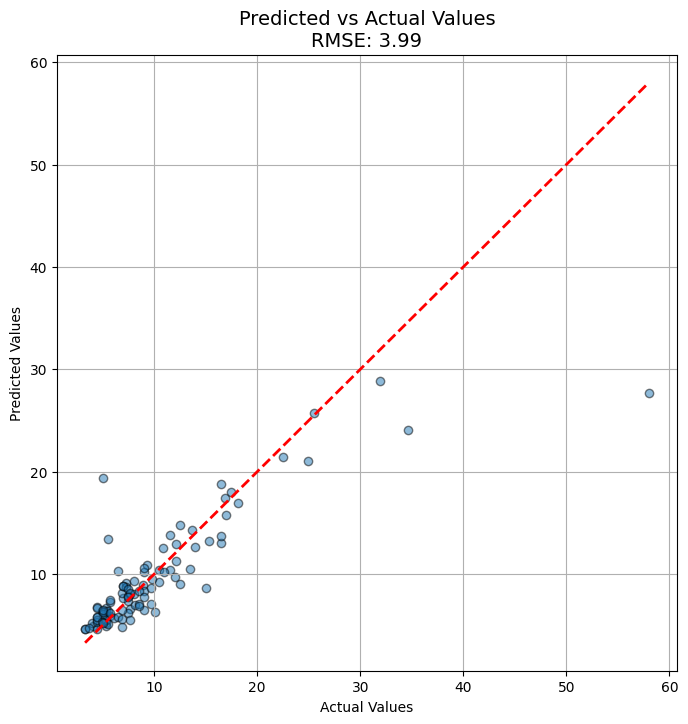

In [26]:
# Create the scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line

# Add title and labels
plt.title(f"Predicted vs Actual Values\nRMSE: {rmse:.2f}", fontsize=14)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

# Add grid
plt.grid(True)

# Show the plot
plt.show()